<a href="https://colab.research.google.com/github/zahraDehghanian97/stock_market/blob/master/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [13]:
import warnings
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import glob

load data

In [11]:
! curl -L https://api.github.com/repos/zahraDehghanian97/stock_market/tarball --output repo.tar
! tar xf repo.tar --wildcards "*/tickers_data/*.csv" --strip-components=1 
! rm -rf repo.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  166k    0  166k    0     0   500k      0 --:--:-- --:--:-- --:--:--  500k


put dataset in pandas dataframe

run arima model

In [14]:


def load_df_from_csv(dir_name:str) -> dict:
  stocks = {}
  for file_name in sorted(glob.glob(dir_name+'/*.csv')):
    df = pd.read_csv(file_name,names=['close'])
    dataset_name = file_name.split("/")[1].split(".csv")[0]
    print(dataset_name)
    stocks[dataset_name] = df
  return stocks

stocks = load_df_from_csv(dir_name="tickers_data")



خچرخش
شپنا



ARIMA Model
loading the dataset...
splitting training and testing set...
building and training model...
run arima model
predicting...
---------------------------
The prediction for the next day: [12428.88723791]
last result = -1
---------------------------
evaluating performance...
Testing Accuracy:  60.67 %
------------------------
plotting the graph...


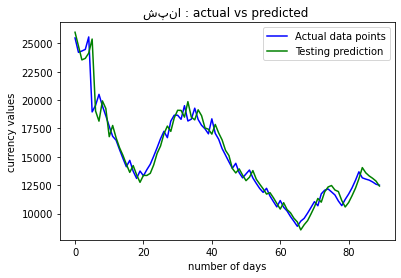

done...


In [18]:
TRAINING_PERCENTAGE = 0.7
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
NUMBER_OF_PREVIOUS_DATA_POINTS = 3
LENGTH_DATA_SET = 0
TRAINING_SET_LENGTH = 0
TESTING_SET_LENGTH = 0



def get_data(name_Stock,number_of_days):
  df = stocks[name_Stock]
  close_data = df.close.values.tolist()
  len_data = len(close_data)-1
  close_data = close_data[len_data-number_of_days:len_data]
  new_data = []
  for i in range(len(close_data)):
    new_data.append(float(close_data[i]))
  return new_data

def training_testing_buckets(raw_data, training_percentage, testing_percentage):
    global TRAINING_SET_LENGTH, TESTING_SET_LENGTH
    TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * training_percentage)
    TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
    training_set, testing_set = raw_data[0:TRAINING_SET_LENGTH], raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]
    return training_set, testing_set


def evaluate_performance(testing_actual, testing_predict):
    counter = 0
    for i in range(len(testing_actual)-1):
        predict=testing_predict[i+1]- testing_predict[i]
        actual = testing_actual[i+1]-testing_actual[i]
        if (actual > 0 and predict > 0) or (actual < 0 and predict < 0):
            counter+=1
    counter = round((counter / (len(testing_actual)-1))*100,2)
    return counter


def plot_model(currency, testing_actual, testing_predict):
    actual = pyplot.plot(testing_actual, label="Actual data points", color="blue")
    testing = pyplot.plot(testing_predict, label="Testing prediction", color="green")
    pyplot.ylabel('currency values')
    pyplot.xlabel('number of days')
    pyplot.title( currency + ' : actual vs predicted ')
    pyplot.legend()
    pyplot.show()


def load_data_set(currency):
    tse.download(symbols=stock_name)
    ticker = tse.Ticker(stock_name)
    data = ticker.history
    raw_data = data.close.values.tolist()
    global LENGTH_DATA_SET
    LENGTH_DATA_SET = len(raw_data)
    return raw_data


def build_model_predict_arima(training_set, testing_set):
    testing_predict = list()
    training_predict = list(training_set)
    for testing_set_index in range(TESTING_SET_LENGTH):
        arima = ARIMA(training_predict, order=(5, 1, 0))
        arima_model = arima.fit(disp=0)
        forecasting = arima_model.forecast()[0].tolist()[0]
        testing_predict.append(forecasting)
        training_predict.append(testing_set[testing_set_index])
        # print("Predicted = ", testing_predict[-1], "Expected = ", testing_set[testing_set_index])
    print('predicting...')
    print("---------------------------")
    forcast = arima_model.forecast()[0]
    print('The prediction for the next day:', forcast)
    if forcast- testing_set[-1] > 0 : print("last result = +1")
    else :  print("last result = -1")
    print("---------------------------")
    return testing_predict


def run_model(currency,type):
    global LENGTH_DATA_SET
    print('loading the dataset...')
    # raw_data = load_data_set(currency)
    raw_data = get_data(currency,300)
    LENGTH_DATA_SET = len(raw_data)

    print('splitting training and testing set...')
    training_actual, testing_actual = training_testing_buckets(raw_data, TRAINING_PERCENTAGE, TESTING_PERCENTAGE)

    print('building and training model...')
    if type == 1 :
      print("run ARIMA model")
      testing_predict = build_model_predict_arima(training_actual, testing_actual)

    print('evaluating performance...')
    accuracy_model = evaluate_performance(testing_actual, testing_predict)
    print('Testing Accuracy: ', accuracy_model,"%")

    print("------------------------")
    print('plotting the graph...')
    plot_model(currency, testing_actual, testing_predict)

    print('done...')
    return raw_data, testing_predict


if __name__ == '__main__':
    warnings.filterwarnings("ignore")
    # stock_name = input('Enter stock name:')
    stock_name = 'شپنا'
    type = 1 #if type = 1 arima    type=2 lstm      type=3 RNN
    run_model(stock_name,type)  # setting the entry point
